# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [7]:
# df.info() tras uma forma melhor e mais completa a informação

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [9]:
# Alterado da coluna Idoso para int
df['Idoso'] = df['Idoso'].astype(int)

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [12]:
(df.isnull().sum() / len(df)) * 100 

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [15]:
# verifica quantos valores nulos em cada colunas.
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [17]:
# a coluna PhoneService não tem relação com outra coluna para fazer uma analise melhor, se preenchermos a coluna podemos pode um vies nela ou distorcer
# a informação do arquivo, optei por retirar ela, mesmo sendo 59% dos dados;
df.drop(columns='PhoneService', inplace=True)

In [19]:
# Para manter a segunração apgamos o customerID 
df.drop(columns='customerID', inplace=True)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

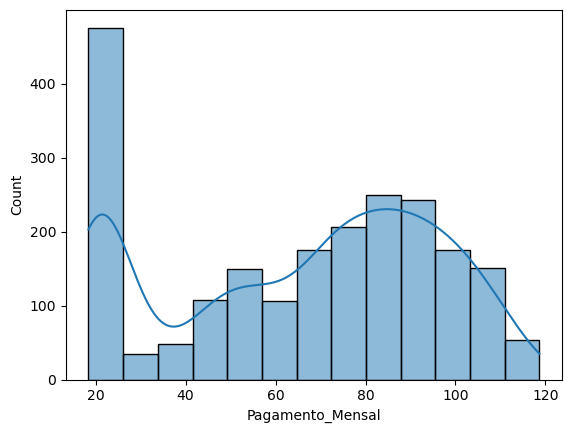

In [22]:
sns.histplot(df['Pagamento_Mensal'].dropna(), kde=True)
plt.show()


In [24]:
mediana = df['Pagamento_Mensal'].median()
print(f"A mediana de Pagamento_Mensal é: R${mediana:.2f}")


A mediana de Pagamento_Mensal é: R$71.45


**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [28]:
# a mediana não muito afetada pelo outlier, mesmo apresentando no valor mensal pago 20 
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(mediana)

In [30]:
# os dados de genero e bem baixa, assim podemos usar o moda.
moda_genero = df['Genero'].mode()[0]
df['Genero'] = df['Genero'].fillna(moda_genero)

In [32]:
(df.isnull().sum() / len(df)) * 100 

Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.2
dtype: float64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [35]:
# verificando dados da coluna
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [37]:
# ajustado os dados para ficarem iguais para padronização
df['Genero'] = df['Genero'].str.strip().str.lower()

# padronizando os dados da coluna Genero
df['Genero'] = df['Genero'].replace({
    'f': 'female',
    'm': 'male'
})

In [39]:
# verificando alteração feita
df['Genero'].unique()

array(['female', 'male'], dtype=object)

In [41]:
# verificando dados da coluna
df['Servico_Internet'].unique()

array(['DSL', 'Fiber optic', 'dsl', 'No'], dtype=object)

In [43]:
# padronizando os dados da coluna Servico_Internet
df['Servico_Internet'] = df['Servico_Internet'].replace({
    'dsl': 'DSL'
})

In [45]:
# verificando alteração feita
df['Servico_Internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [48]:
# Ajustado o nome da coluna Dependents
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)

In [50]:
# Ajustado o nome da coluna PaymentMethod
df.rename(columns={'PaymentMethod': 'Metodo_de_Pagamento'}, inplace=True)

In [52]:
# Verificando alteração.
df.head(10)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_de_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,male,0,No,No,2,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,151.65,Yes
5,male,0,No,No,8,Fiber optic,No,No,Yes,Month-to-month,Electronic check,71.45,820.50,NaN
6,male,0,No,Yes,22,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),71.45,1949.40,NaN
7,male,0,No,No,10,DSL,Yes,No,No,Month-to-month,Mailed check,71.45,301.90,NaN
8,male,0,Yes,No,28,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,71.45,3046.05,NaN
9,male,0,No,Yes,62,DSL,Yes,No,No,One year,Bank transfer (automatic),71.45,3487.95,NaN


In [54]:
df.to_csv('Telecon_processado.csv', index=False)